In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [17]:
from matplotlib import pyplot as plt
import process
import low_structures
import visualize
import numpy as np

In [3]:
img_org = process.get_example_image('s5.png')
img = process.pre_process(img_org)
lines = process.find_lines(img, 100)
dedup = low_structures.remove_duplicate_lines(lines, 15, img.shape)

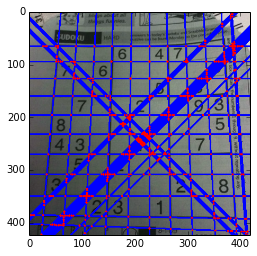

In [4]:
points = low_structures.intersections(dedup)
img_w_lines = visualize.draw_lines(img_org, dedup)
img_w_points = visualize.draw_points(img_w_lines, points.values())
_ = plt.imshow(img_w_points)

In [51]:
buckets = low_structures.generate_angle_buckets(15, step=7.5, ortogonal=True)
classes = {}
for bucket_angle, bucket in buckets.iteritems():
    matches = []

    for line in dedup:
        if low_structures.is_angle_in_bucket(line[0][1], bucket):
            matches.append(line)

    if matches:
        classes[bucket_angle] = matches
    print np.rad2deg(bucket_angle), ":", len(matches)

0.0 : 23
7.5 : 17
15.0 : 0
22.5 : 0
30.0 : 0
37.5 : 0
45.0 : 18
52.5 : 18
60.0 : 0
67.5 : 0
75.0 : 0


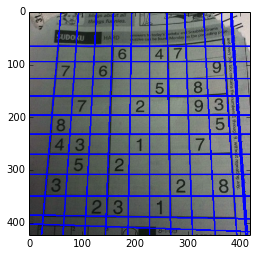

In [57]:
line_class = classes.values()[0]
tmp = visualize.draw_lines(img_org, line_class)
plt.imshow(tmp, hold=True)